In [1]:
#import part

from rdkit import Chem
import pandas as pd
import matplotlib.pyplot as plt
import math

In [1]:
with open('ligands.tsv', 'r') as f:
    lines = f.readlines()

print(lines[0])

Ligand Name	CID	Molecular Formula	Molecular Weight	IUPAC Name	Canonical SMILES	Isomeric SMILES	InChI Std. ID	InChI Key	XlogP	Hydrogen Bond Donors	Hydrogen Bond Acceptors



In [6]:
#smiles_translater.py

smiles = []
with open('ligands.tsv', 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        if i == 0:
            pass
        else:
            tmp = lines[i].split('\t')[6]
            smiles.append(tmp)


all_list = []
for i in range(len(smiles)):
    m = Chem.MolFromSmiles(smiles[i])
    z = Chem.rdmolfiles.MolToSmiles(m)
    all_list.append(z)
    if i % 1000 == 0:
        print(f'steps: {i}', end='\r')


with open('ligands_translated.txt', 'w') as f:
    for a in range(len(lines)):
        if a == 0:
            f.write(lines[a])
        else:
            tmp = lines[a].split('\t')
            tmp[6] = all_list[a-1]
            output = '\t'.join(tmp)
            f.write(output)

steps: 45000

KeyboardInterrupt: 

In [4]:
output = []

with open('targets.tsv', 'r') as f:
    lines = f.readlines()
    for lin in lines:
        ID = lin.split('\t')[1]
        prot = lin.split('\t')[4].replace('\n', '')
        output.append([ID, prot])


pd.DataFrame(output).to_csv('targets_table.csv', header=False, index=False)

In [11]:
#conversion.py

output = []
with open('ligands_translated.txt', 'r') as f:
    lines = f.readlines()
    for lin in lines:
        ID = lin.split('\t')[-4]
        ligand = lin.split('\t')[6]
        output.append([ID, ligand])


pd.DataFrame(output).to_csv('ligands_table_new.csv', header=False, index=False)

In [13]:
#split_GLASS.py

with open('interactions_total.tsv', 'r') as f:
    total_file = f.readlines()
    
print(total_file[:2])

['UniProt ID\tInChI Key\tParameter\tValue\tUnit\tDatabase Source\tDatabase Target ID\tDatabase Ligand ID\tReference\n', 'O95136\tXTUSMJNHGPASSE-UHFFFAOYSA-N\tEC50\t>10000\tnM\tChEMBL\tCHEMBL2955\tCHEMBL1455786\tPubChem BioAssay data set\n']


In [6]:
data_list = []
pos_list = []
neg_list = []

with open('interactions_total.tsv', 'r') as f:
    total_file = f.readlines()
    for i in total_file:
        if 'UniProt ID' in i:
            title = i
        split_file = i.split('\t')
        if (split_file[2] != 'Ki') & (split_file[2] != 'IC50') & (split_file[2] != 'EC50'):
            pass
        else:
            if split_file[4] != 'nM':
                pass
            elif ' - ' in split_file[3]:
                pass
            elif '>' in split_file[3]:
                pass
                '''split_file[3] = split_file[3].replace('>', '')
                split_file[3] = float(split_file[3])
                data_list.append(split_file)'''
            elif '<' in split_file[3]:
                pass
                '''split_file[3] = split_file[3].replace('<', '')
                split_file[3] = float(split_file[3])
                data_list.append(split_file)'''
            else:
                split_file[3] = float(split_file[3])
                data_list.append(split_file)

for item in data_list:
    if (item[3] > 1000):
        item[3] = str(item[3])
        neg_list.append(item)
    elif item[3] <= 1000:
        item[3] = str(item[3])
        pos_list.append(item)

with open('positive_pair_new.txt', 'w') as f:
    f.write(title)
    for i in pos_list:
        i = '\t'.join(i)
        f.write(i)

with open('negative_pair_new.txt', 'w') as f:
    f.write(title)
    for i in neg_list:
        i = '\t'.join(i)
        f.write(i)

In [43]:
for i in total_file[:3]:
    print(i)

UniProt ID	InChI Key	Parameter	Value	Unit	Database Source	Database Target ID	Database Ligand ID	Reference

O95136	XTUSMJNHGPASSE-UHFFFAOYSA-N	EC50	>10000	nM	ChEMBL	CHEMBL2955	CHEMBL1455786	PubChem BioAssay data set

P41146	DWZCXYUZSXSRCU-OQYWAUBWSA-N	IC50	 1.7	nM	BindingDB	N/A	50372277	18068993



In [32]:
symbol = ['>', '<']
bio_value = []
for i in total_file[1:]:
    temp = i.split("\t")[3]
      
    if temp[0] in symbol:
        temp = temp[1:]
    
    try:
        bio_value.append(float(temp.lstrip()))
    except:
        print(temp.lstrip())

N/A
N/A
2.51188643150958 - 125.892541179417
0.794328234724282 - 2.51188643150958
315 - 565
1000000 - 1584893.19246111
158489.319246111 - 630957.344480193
3.98107170553497 - 39.8107170553497
10 - 31.6227766016838
0.199526231496888 - 0.794328234724282
N/A
N/A
N/A
N/A
19952.6231496888 - 39810.7170553497
N/A
1584.89319246111 - 7943.28234724282
N/A
0.501187233627271 - 50.1187233627272
158.489249640273 - 794.328409152126
N/A
12.5892541179417 - 15.8489319246111
N/A
25.1188643150958 - 3162.27766016838
N/A
N/A
N/A
N/A
1995.26231496888 - 2511.88643150958
N/A
3162.27766016838 - 10000
0.398107170553497 - 1.58489319246111
N/A
0.125892651759258 - 0.398107520237658
7.94000005722046 - 199
5 - 11.6999998092651
N/A
63.0957344480193 - 79.4328234724282
4400 - 10000
0.05 - 0.2
N/A
N/A
7.94327537013265 - 50.1187013514285
5 - 12
12.5892541179417 - 100
N/A
N/A
N/A
0.630999982357025 - 12.6000003814697
N/A
N/A
32500 - 48000
0.794328234724282 - 12.5892541179417
12.5892513534472 - 19.9526319125485
316.22776601683

N/A
501.187233627272 - 630.957344480193
N/A
316.227766016838 - 1000
0.0630957344480194 - 0.0794328234724282
N/A
3.16227766016838 - 100
N/A
N/A
1 - 1.25892651759258
N/A
N/A
N/A
N/A
N/A
N/A
0.389999985694885 - 13.1999998092651
10 - 2511.88643150958
N/A
N/A
N/A
N/A
1.77 - 3.7
100 - 501.187233627272
N/A
N/A
0.501187013514285 - 2.51188422515362
39.8107170553497 - 100
1.58489319246111 - 3.16227766016838
251.188643150958 - 398.107170553497
6.30957344480194 - 19.9526231496888
N/A
N/A
N/A
N/A
N/A
3.98107170553497 - 15.8489319246111
N/A
N/A
N/A
N/A
1.99526231496888 - 5.01187233627271
3.16000008583069 - 39.7999992370605
N/A
3.98107170553497 - 31.6227766016838
N/A
N/A
N/A
1.25892541179417 - 1.58489319246111
N/A
2344.22881531992 - 6165.95001861482
10 - 12.5892513534472
N/A
N/A
N/A
N/A
0.0399999991059303 - 0.300000011920929
N/A
7.4 - 437
1.99526319125485 - 3.16227766016838
0.630957621586148 - 12.5892513534472
5.01187013514285 - 15.8489249640273
N/A
199.526231496888 - 251.188643150958
N/A
N/A
N/A
3.9

0.316227766016838 - 63.0957344480193
N/A
N/A
0.316227766016838 - 1
15.8489319246111 - 63.0957344480193
1.99526231496888 - 15.8489319246111
N/A
1 - 19.9526231496888
1995.26231496888 - 63095.7344480193
N/A
6.30957621586148 - 25.1188698309886
N/A
19.9526319125485 - 12589.2513534472
N/A
N/A
2511.88698309886 - 12589.2513534472
316.227766016838 - 1000
N/A
1.2 - 1.4
N/A
0.251188422515362 - 6.30957621586148
N/A
N/A
N/A
3.16227766016838 - 25.1188643150958
N/A
N/A
N/A
100 - 1258.92513534472
N/A
N/A
N/A
N/A
N/A
25.1188643150958 - 31.6227766016838
0.630957621586148 - 7.94327537013265
100 - 1258.92541179417
30.1 - 38
N/A
6.30957344480194 - 158.489319246111
7943.28409152126 - 31622.7766016838
N/A
0.316227766016838 - 3.16227766016838
N/A
39.8107083132507 - 50.1187013514285
1 - 6.30957621586148
N/A
N/A
N/A
N/A
N/A
N/A
0.630957344480194 - 6.30957344480194
N/A
50.1187233627272 - 630.957344480193
N/A
1.99526319125485 - 15.8489249640273
N/A
22000 - 25300
N/A
N/A
100 - 316.227766016838
N/A
31.6227766016838

N/A
2.51188643150958 - 15.8489319246111
N/A
31.6227766016838 - 63.0957344480193
N/A
2.51188422515362 - 79.4328409152126
5011.87233627273 - 10000
0.501187013514285 - 1
3.98107170553497 - 398.107170553497
N/A
0.630957344480194 - 7.94328234724282
2511.88698309886 - 50118.7013514285
N/A
1.99526231496888 - 39.8107170553497
12.5 - 19.9
58 - 240
N/A
63.0957344480193 - 158.489319246111
N/A
N/A
0.125892651759258 - 1.99526319125485
5.01187013514285 - 50.1187013514285
N/A
N/A
199.526231496888 - 1584.89319246111
0.125892541179417 - 7.94328234724282
N/A
0.629999995231628 - 6.30999994277954
N/A
794.328234724282 - 5011.87233627273
N/A
N/A
N/A
N/A
15.8489319246111 - 63.0957344480193
1 - 10
N/A
N/A
N/A
N/A
6.30957344480194 - 19.9526231496888
N/A
N/A
N/A
N/A
100 - 398.107083132507
N/A
0.398000001907349 - 1
0.316227766016838 - 7.94327537013265
1.99526231496888 - 39.8107170553497
N/A
0.800000011920929 - 0.899999976158142
N/A
N/A
10 - 100
N/A
0.0794328234724282 - 0.158489319246111
19.9526231496888 - 316.22

N/A
N/A
N/A
N/A
N/A
N/A
100 - 158.489319246111
501.187233627272 - 1258.92541179417
N/A
N/A
79.4328409152126 - 398.107083132507
150 - 318
125.892541179417 - 1258.92541179417
N/A
7.94328234724282 - 12.5892541179417
N/A
0.501187233627271 - 3.98107170553497
25.1188698309886 - 501.187013514285
N/A
N/A
0.398107170553497 - 0.501187233627271
1.58489319246111 - 125.892541179417
N/A
N/A
N/A
5.01187233627271 - 12.5892541179417
N/A
N/A
N/A
N/A
0.501187013514285 - 39.8107083132507
N/A
19.9526231496888 - 31.6227766016838
N/A
N/A
N/A
N/A
N/A
0.251188422515362 - 19.9526319125485
0.794327537013265 - 7.94327537013265
N/A
N/A
N/A
N/A
630.957344480193 - 3162.27766016838
N/A
N/A
1995.26319125485 - 125892.513534472
7 - 25
50.1187233627272 - 125.892541179417
N/A
N/A
1584.89319246111 - 2511.88643150958
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
100 - 125.892541179417
1.99526231496888 - 31.6227766016838
N/A
N/A
N/A
N/A
N/A
N/A
2.51188422515362 - 12.5892513534472
10000 - 15848.9319246111
1.25892541179417 - 1.995262314

100 - 1995.26231496888
0.794327537013265 - 5.01187013514285
N/A
1 - 5
N/A
N/A
3.98000001907349 - 12.6000003814697
1 - 1.58489319246111
N/A
1 - 3.16000008583069
N/A
N/A
N/A
N/A
0.01 - 0.0630957621586207
N/A
N/A
N/A
N/A
N/A
N/A
N/A
0.0199526319125504 - 0.1
1.2 - 1100
20.3999996185303 - 27
N/A
199.526231496888 - 398.107170553497
N/A
0.125892541179417 - 0.398107170553497
19.9526231496888 - 39.8107170553497
N/A
N/A
N/A
N/A
N/A
N/A
19952.6231496888 - 31622.7766016838
3.98107520237658 - 12.5892513534472
199.526231496888 - 316.227766016838
3.98107170553497 - 5.01187233627271
5.01187233627271 - 15.8489319246111
N/A
N/A
39.8107083132507 - 125.892513534472
N/A
N/A
1.99526231496888 - 6.30957344480194
100 - 398.107170553497
1584.89249640273 - 2511.88698309886
N/A
N/A
N/A
N/A
130 - 250
N/A
N/A
15848.9249640273 - 25118.8698309886
0.0630957344480194 - 3.98107170553497
N/A
N/A
0.199000000953674 - 7.94000005722046
N/A
N/A
N/A
N/A
18 - 19
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
0.630957621586148 - 5.011870135142

In [41]:
log_value = []

for i in bio_value:
    try:
        log_value.append(-math.log(i))
    except:
        print(i)

-12.7
0.0
0.0
-52.8
0.0
0.0
-4.5
-2.15
-5.3
-5.4
-1.0
0.0
-0.8
-1.04
-3.0
0.0
-0.4
-5.2
0.0
0.0
-15.0
0.0
0.0
-1.0
-0.8
-0.08
0.0
0.0
-20.0
0.0
0.0
-1271.0
0.0
0.0
0.0
-25.7
-0.86
-3.0
0.0
-6.0
0.0
0.0
-17.8
-44.0
-20.0
-2.83
0.0
0.0
0.0
-35.0
-1.0
0.0
0.0
0.0
-56.0
-48.6
0.0
0.0
0.0
0.0
0.0
-2.0
0.0
0.0
-0.903
-1.03
0.0
0.0
0.0
-3.491
0.0
-4.0
-14.39
0.0
0.0
-20.0
0.0
-5.4
-1.1
0.0
0.0
-9.0
0.0
0.0
0.0
-0.5
-2.0
-13.0
0.0
0.0
0.0
-21.0
-21.0
0.0
-61.0
-0.53
0.0
-17.8
0.0
0.0
-8.0
-0.6
0.0
0.0
0.0
-0.14
-15.0
-8.8
-0.05
-10.0
-1.24
-1.73
0.0
0.0
0.0
-1.0
-16.4
0.0
0.0
0.0
0.0
-32.0
-5.0
0.0
-2.53
0.0
0.0
0.0
-100.0
0.0
0.0
0.0
-0.87
0.0
-4.74
-1.26
0.0
0.0
0.0
0.0
0.0
0.0
-5.0
0.0
0.0
0.0
-0.414
-2.5
0.0
-3.26
-0.1
-5.0
-2.98
-9.0
0.0
0.0
0.0
0.0
-12.0
-2.2
-2.0
-18.0
0.0
0.0
0.0
0.0
-0.04
-12.0
-10.0
-9.0
0.0
-33.0
-2.06
-2.0
0.0
-23.2
0.0
-3.959
-0.8
0.0
-0.01
-2.0
-12.0
0.0
-0.63
0.0
0.0
-8.2
0.0
-10.0
-1.83
-3.06
-10.0
-5.5
-10.0
0.0
-6.0
0.0
-16.0
-12.0
-14.0
-2.56
-0.2
-0.16
0.0


-2.0
-7.0
-14.0
-11.0
-105.0
0.0
-3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-34.0
0.0
-2.0
0.0
0.0
-57.0
0.0
-60.3
-0.2
-7.6
0.0
0.0
0.0
-1.98
-1.95
-7.0
0.0
-1.05
0.0
0.0
0.0
0.0
0.0
-16.0
-2.0
0.0
0.0
0.0
-0.3
-1.0
0.0
0.0
0.0
0.0
-5.0
0.0
-21.5
0.0
-115.0
0.0
-0.2
0.0
0.0
0.0
-10.0
-0.03
-21.29
0.0
0.0
0.0
0.0
-1.0
-21.0
-2.9
-4.0
0.0
-1.44
-5.4
-1.397
-60.0
-8.0
0.0
0.0
0.0
-1.0
0.0
-8.8
0.0
-14.6
0.0
0.0
-2.7
-82.0
-3.0
-0.4
-1.201
-93.0
-33.0
-7.0
0.0
0.0
-5.0
-20.4
-13.0
0.0
0.0
-37.0
-13.0
-20.0
-0.84
-5.0
0.0
0.0
0.0
0.0
-6.0
-58.0
0.0
-16.3
0.0
0.0
-6.0
-37.0
-883.0
-1.0
-1.8
0.0
0.0
0.0
0.0
0.0
0.0
-14.0
-17.0
0.0
0.0
0.0
0.0
-2.12
-2.54
0.0
0.0
-3.0
-1.88
0.0
0.0
0.0
0.0
0.0
0.0
-34.0
-0.16
0.0
0.0
-28100.0
-1.0
-13.0
0.0
-0.079
0.0
0.0
-5.0
-1.6
-2.72
-1.914
-0.951
0.0
0.0
0.0
-4.0
0.0
-1.59
-5.0
-6.8
-7.0
0.0
-2.0
-3.2
-1.48
0.0
-4.19
-7.2
0.0
0.0
-6.6
0.0
-1.0
0.0
0.0
0.0
-4.0
-0.04
0.0
0.0
-38.0
-1.2
0.0
0.0
-7.4
0.0
0.0
0.0
0.0
-0.9
0.0
0.0
0.0
0.0
-2.08
0.0
-1.0
0.0
0.0
0.0

0.0
-10.0
-0.21
-2.08
0.0
-16.0
-60.0
0.0
-2.76
-8.0
0.0
0.0
-2.26
0.0
-9.0
0.0
0.0
0.0
0.0
-5.2
0.0
0.0
-8.0
0.0
0.0
0.0
-7.9
0.0
-8.0
-9.3
-59.0
0.0
0.0
0.0
0.0
0.0
-16.0
0.0
-2.0
-3.2
0.0
0.0
-37.0
0.0
-2.146
0.0
0.0
-3.41
-7.7
0.0
-42.0
-10.0
0.0
-0.327
-7.0
-2.7
-0.48
0.0
-0.52
0.0
0.0
-7.1
-4.4
0.0
-1.5
0.0
0.0
-0.62
0.0
0.0
0.0
0.0
0.0
-17.0
0.0
-14.0
0.0
-7.0
-4.4
-2.0
-8.0
-23.0
0.0
0.0
0.0
0.0
-3.0
-0.34
-6.0
0.0
-123.0
-5.0
0.0
0.0
-1.0
-0.05
0.0
0.0
0.0
0.0
0.0
0.0
-12.0
0.0
-49.0
0.0
0.0
-22.0
0.0
0.0
-0.4
-11.0
-2.0
-4.0
-12.1
-3.26
0.0
0.0
0.0
-2.0
-12.0
-5.8
0.0
-0.23
0.0
0.0
-1.74
-0.69
0.0
-0.2
0.0
-34.5
-7.0
0.0
-20.0
0.0
0.0
0.0
0.0
0.0
-0.6
0.0
-6.0
-12.0
0.0
-5.2
0.0
-1.06
0.0
0.0
0.0
0.0
-2.78
-16.0
-5.0
0.0
-1.0
-37.4
0.0
-82.0
0.0
-2.78
-0.73
0.0
0.0
0.0
0.0
0.0
-0.763
-1.1
0.0
0.0
-3.52
0.0
-2.0
0.0
-2.48
0.0
0.0
-31.9
-2.8
-2.6
0.0
0.0
0.0
0.0
-14.8
-12.0
0.0
0.0
0.0
0.0
-5.7
-0.91
0.0
0.0
0.0
-0.95
-8.0
-1.44
-0.64
-14.0
-1.3
-10.0
-1.53
-7.0
0.0
-0.66
0.0
0

0.0
0.0
-5.8
-12.0
-49.0
-1.0
0.0
-7.5
0.0
0.0
-9.1
-1.045
0.0
-9.0
-11.0
-1.0
-16.0
0.0
0.0
-0.12
0.0
-72.0
0.0
0.0
-18.0
-2.946
0.0
-15.0
-2.63
0.0
0.0
0.0
-0.929
0.0
-36.0
-3.0
-1.0
-6.0
0.0
0.0
0.0
-19.0
-3.0
-2.86
0.0
0.0
-24.0
0.0
-7.0
-0.86
-9.0
0.0
0.0
-161.0
-17.0
0.0
0.0
0.0
0.0
-3.0
-0.71
0.0
0.0
0.0
-6.0
0.0
-3.8
-0.04
0.0
-80.0
-6.0
-3.4
0.0
-14.0
-0.035
0.0
0.0
0.0
-52.0
-1.0
0.0
-54.0
-17.0
0.0
0.0
0.0
0.0
-24.0
-145.0
-6.4
0.0
0.0
-0.806
-6.0
-1.16
-4.279
0.0
-49.0
0.0
0.0
0.0
0.0
0.0
-0.518
0.0
0.0
-2.0
-10.0
0.0
-13.0
-1.2
-51.0
-18.0
0.0
0.0
0.0
0.0
-13.1
-1.0
-74.4
-4.0
0.0
-1.0
0.0
-0.11
0.0
0.0
-0.46
-7.7
0.0
-4.51
0.0
-64.0
-0.52
-3.0
-1.7
-29.0
-0.87
-7.0
-1.2
0.0
0.0
0.0
0.0
0.0
0.0
-0.18
-5.0
-9.6
-5.6
0.0
0.0
0.0
-9.0
-0.39
0.0
0.0
0.0
-9.0
0.0
-56.0
-11.2
0.0
0.0
-2.0
-14.0
-72.0
-1.79
0.0
-40.8
0.0
0.0
-3.83
-2.0
-56.0
-2.58
-6.0
-2.85
0.0
-0.42
0.0
-3.415
-10.31
0.0
0.0
-0.477
-3.0
-0.08
-814.0
-7.3
-23.0
-31.0
-0.24
-8.0
0.0
0.0
0.0
0.0
-12.0
0.0
0.0
0.0


In [39]:
log_value

[9.210340371976184,
 0.5306282510621704,
 10.361633658392659,
 4.454347296253507,
 4.9344739331306915,
 13.527828485512494,
 9.210340371976184,
 4.7535901911063645,
 10.246502623771088,
 3.912023005428146,
 0.26236426446749106,
 -0.7985076962177716,
 7.495541943884256,
 9.901114739640875,
 4.356708826689592,
 0.47000362924573563,
 3.4339872044851463,
 4.23410650459726,
 7.649692623711514,
 6.907755278982137,
 9.440602525810386,
 2.501435951739211,
 3.6375861597263857,
 1.3815330440181801,
 2.9444389791664403,
 5.703782474656201,
 4.406719247264253,
 5.480138798300309,
 3.332204510175204,
 -0.21072103131565253,
 1.0986122886681098,
 6.8001700683022,
 4.672828834461906,
 1.589235205116581,
 1.5686159179138452,
 9.852194258148577,
 6.040254711277414,
 8.354674261918463,
 5.993961427306569,
 2.4849066497880004,
 9.210340371976184,
 8.749827562083782,
 10.591890999361503,
 5.065691499844334,
 9.325471004229762,
 7.354362330421477,
 3.091042453358316,
 8.98008408502477,
 0.7419373447293773,


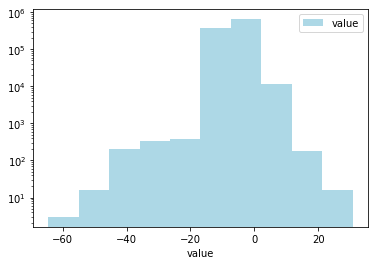

In [42]:
plt.hist(log_value, density=False, color = 'lightblue', cumulative = False, label = "value", log = True)
plt.legend()
plt.xlabel('value')
plt.show()

In [2]:
#self change
#negative pair

with open('negative_pair_new.txt', 'r') as f:
    lines = f.readlines()

In [8]:
lines[0:3]

['UniProt ID\tInChI Key\tParameter\tValue\tUnit\tDatabase Source\tDatabase Target ID\tDatabase Ligand ID\tReference\n',
 'P14416\tFKYWSGYMKJUZEP-ZOBUZTSGSA-N\tKi\t750000.0\tnM\tChEMBL\tCHEMBL217\tCHEMBL1224527\t20709559\n',
 'P32245\tXBNQSGNMSNMDCQ-UHFFFAOYSA-N\tKi\t1800.0\tnM\tBindingDB\tN/A\t50155379\t15482933\n']

In [5]:
target = []
ligand = []
i = 0
for line in lines[1:]:
    raw = line.split('\t')
    target.append(raw[0])
    ligand.append(raw[1])
    if i % 1000 == 0:
        print(f'steps: {i}', end='\r')
    i = i+1

In [7]:
print(len(target))
print(len(ligand))

133772
133772


In [9]:
neg_df = pd.DataFrame((zip(target, ligand)), columns = ['UniProt ID', 'InChI Key'])
pd.DataFrame(neg_df).to_csv('negative_pair_unfilt_unchange.csv')

In [10]:
neg_df

,UniProt ID,InChI Key
0,P14416,FKYWSGYMKJUZEP-ZOBUZTSGSA-N
1,P32245,XBNQSGNMSNMDCQ-UHFFFAOYSA-N
2,P26684,SBACFWNGSKLATN-UHFFFAOYSA-N
3,P29371,WUXJBLYSOQWKLU-ZTTXAYQISA-N
4,P25099,AZJNHTJGEONOST-VDXVPGQCSA-N
...,...,...
133767,P41145,LLYOXZQVOKALCD-UHFFFAOYSA-N
133768,Q01727,BXQPDOCYIGQSTK-FCDQGJHFSA-N
133769,O43613,JCZCHJNFGCTGQF-UHFFFAOYSA-N
133770,P61169,FUMLYVJDBXPSSP-QFBILLFUSA-N


In [12]:
%%time

with open('negative_pair_new.txt', 'r') as f:
    lines = f.readlines()

pair = []
i = 0
for line in lines[1:]:
    raw = line.split('\t')
    if i % 1000 == 0:
        print(f'steps: {i}', end='\r')
    i = i+1
    temp = [raw[0], raw[1]]
    if temp not in pair:
        pair.append(temp)
    
neg_df = pd.DataFrame(pair, columns = ['UniProt ID', 'InChI Key'])
pd.DataFrame(neg_df).to_csv('negative_pair_nosame_unchange.csv')

Wall time: 1min 36s


In [13]:
neg_df

,UniProt ID,InChI Key
0,P14416,FKYWSGYMKJUZEP-ZOBUZTSGSA-N
1,P32245,XBNQSGNMSNMDCQ-UHFFFAOYSA-N
2,P26684,SBACFWNGSKLATN-UHFFFAOYSA-N
3,P29371,WUXJBLYSOQWKLU-ZTTXAYQISA-N
4,P25099,AZJNHTJGEONOST-VDXVPGQCSA-N
...,...,...
69768,P34972,AEIRXXZCCCQMDL-UHFFFAOYSA-N
69769,P08908,MSIIQGRNGMMSTR-UHFFFAOYSA-N
69770,P25099,QWIYMTSDMCWKDA-UHFFFAOYSA-N
69771,O02824,UVQRVHVFXJDEEN-UHFFFAOYSA-N


In [3]:
#self change
#positive pair

with open('positive_pair_new.txt', 'r') as f:
    lines = f.readlines()
    
target = []
ligand = []
i = 0
for line in lines[1:]:
    raw = line.split('\t')
    target.append(raw[0])
    ligand.append(raw[1])
    if i % 1000 == 0:
        print(f'steps: {i}', end='\r')
    i = i+1
    
pos_df = pd.DataFrame((zip(target, ligand)), columns = ['UniProt ID', 'InChI Key'])
pd.DataFrame(pos_df).to_csv('positive_pair_unfilt_unchange.csv')

In [5]:
pos_df

,UniProt ID,InChI Key
0,P41146,DWZCXYUZSXSRCU-OQYWAUBWSA-N
1,P49682,LENKUUPXOOPDDB-HXUWFJFHSA-N
2,P31424,KWNYPHGYOPXYPZ-UHFFFAOYSA-N
3,Q14416,SEWPIHHWIJFHPE-UHFFFAOYSA-N
4,P21554,BQYPKXDCTROOHB-AWEZNQCLSA-N
...,...,...
493941,P41595,DIZZADVCOPMWQC-UHFFFAOYSA-N
493942,P34972,NWQXSGCFNCWPHK-UHFFFAOYSA-N
493943,P25101,WDJALAMRYSCDQD-RPWUZVMVSA-N
493944,Q2KIP6,XIJHWXXXIMEHKW-JRVZRWKPSA-N


In [4]:
print(len(target))
print(len(ligand))

493946
493946


In [7]:
fliter = ((pos_df['UniProt ID'] == 'P41146') & (pos_df['InChI Key'] == 'DWZCXYUZSXSRCU-OQYWAUBWSA-N'))

pos_df[fliter]

,UniProt ID,InChI Key
0,P41146,DWZCXYUZSXSRCU-OQYWAUBWSA-N
455,P41146,DWZCXYUZSXSRCU-OQYWAUBWSA-N
373076,P41146,DWZCXYUZSXSRCU-OQYWAUBWSA-N
448957,P41146,DWZCXYUZSXSRCU-OQYWAUBWSA-N


In [10]:
pair = []
i = 0
for line in lines[1:]:
    raw = line.split('\t')
    if i % 1000 == 0:
        print(f'steps: {i}', end='\r')
    i = i+1
    temp = [raw[0], raw[1]]
    if temp not in pair:
        pair.append(temp)
    
pos_df = pd.DataFrame(pair, columns = ['UniProt ID', 'InChI Key'])
pd.DataFrame(pos_df).to_csv('positive_pair_nosame_unchange.csv')

In [11]:
pos_df

,UniProt ID,InChI Key
0,P41146,DWZCXYUZSXSRCU-OQYWAUBWSA-N
1,P49682,LENKUUPXOOPDDB-HXUWFJFHSA-N
2,P31424,KWNYPHGYOPXYPZ-UHFFFAOYSA-N
3,Q14416,SEWPIHHWIJFHPE-UHFFFAOYSA-N
4,P21554,BQYPKXDCTROOHB-AWEZNQCLSA-N
...,...,...
214647,P21453,HIZAJVDPLRKQJL-NFBKMPQASA-N
214648,P28221,LHWYHPOPXMPQGV-UHFFFAOYSA-N
214649,P28336,IJMYVYYYYRIKRS-UHFFFAOYSA-N
214650,Q14416,QQHCCUUUDODHIM-QGZVFWFLSA-N


In [2]:
#find the pair that ligand exist at both positive and negative

pos_df = pd.read_csv('positive_pair_nosame_unchange.csv')
neg_df = pd.read_csv('negative_pair_nosame_unchange.csv')


In [3]:
neg_ligands = []

for ligand in neg_df['InChI Key']:
    if ligand not in neg_ligands:
        neg_ligands.append(ligand)

In [6]:
both_ligands = []

for ligand in pos_df['InChI Key']:
    if ligand in neg_ligands:
        both_ligands.append(ligand)

In [10]:
fliter = pos_df['InChI Key'].isin(both_ligands)

pos_df[fliter]

,Unnamed: 0,UniProt ID,InChI Key
4,4,P21554,BQYPKXDCTROOHB-AWEZNQCLSA-N
8,8,O14842,STMQJGCAFZYVJO-UHFFFAOYSA-N
9,9,P56481,UVCYUMJOUAVORG-NQDKFOQASA-N
15,15,P33533,WIYUZYBFCWCCQJ-IFKAHUTRSA-N
22,22,P11229,HSFWTAVXXXJJRW-CAOOACKPSA-N
...,...,...,...
214614,214614,P18090,GOEMGAFJFRBGGG-UHFFFAOYSA-N
214625,214625,P42866,RCRZIFPUNHBIAK-NAQXRUJFSA-N
214640,214640,P21453,XCOOCMMEPVWFGD-OXQOHEQNSA-N
214644,214644,P21554,ONTYEGURWWIAAP-UHFFFAOYSA-N


In [11]:
fliter = neg_df['InChI Key'].isin(both_ligands)
neg_df[fliter]

,Unnamed: 0,UniProt ID,InChI Key
0,0,P14416,FKYWSGYMKJUZEP-ZOBUZTSGSA-N
2,2,P26684,SBACFWNGSKLATN-UHFFFAOYSA-N
3,3,P29371,WUXJBLYSOQWKLU-ZTTXAYQISA-N
4,4,P25099,AZJNHTJGEONOST-VDXVPGQCSA-N
6,6,P41145,FGXWKSZFVQUSTL-UHFFFAOYSA-N
...,...,...,...
69765,69765,O43614,SMFRTESAWGAGAJ-UHFFFAOYSA-N
69766,69766,P19327,YQAAQEWGUXUHKQ-QZTJIDSGSA-N
69767,69767,P30543,MXXBRYVSNYZVLB-UHFFFAOYSA-N
69768,69768,P34972,AEIRXXZCCCQMDL-UHFFFAOYSA-N


In [14]:
with open('ligands_both_exist.txt', 'w') as f:
    for a in both_ligands:
        f.write(a + '\n')